# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

Gunakan dataset covid-19, GDP, dan populasi yang sudah disediakan untuk anda pada file country-index.csv dan covid-19-data.csv pada folder “soal no 1”. Lakukan proses data preparation untuk memperbaiki dan mempersiapkan dataset untuk proses analisis yang akan anda lakukan. Silahkan gunakan tools pengolahan data yang anda kuasai.

## Data Load

In [2]:
df_country = pd.read_csv('../data/country-index.csv', sep=';')
df_covid = pd.read_csv('../data/covid-19-data.csv', sep=';')

In [3]:
df_country

,CODE,DATE,population,GDP PER capita,human development indeks
0,AFG,19/10/2020,17.477233,7.497754,0.498
1,ALB,19/10/2020,14.872537,9.376146,0.785
2,DZA,19/10/2020,17.596309,9.540639,0.754
3,AND,19/10/2020,11.254996,0.000000,0.858
4,AGO,19/10/2020,17.307957,8.668969,0.581
...,...,...,...,...,...
50418,THA,31/12/2019,18.061144,9.697550,0.755
50419,ARE,31/12/2019,16.107075,11.116819,0.863
50420,GBR,31/12/2019,18.033340,10.590447,0.922
50421,USA,31/12/2019,19.617637,10.900906,0.924


In [4]:
df_covid

,CODE,COUNTRY,DATE,total case,total death,stringency index
0,AFG,Afghanistan,31/12/2019,0.000000,0.000000,0.000000
1,AFG,Afghanistan,01/01/2020,0.000000,0.000000,0.000000
2,AFG,Afghanistan,02/01/2020,0.000000,0.000000,0.000000
3,AFG,Afghanistan,03/01/2020,0.000000,0.000000,0.000000
4,AFG,Afghanistan,04/01/2020,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
50418,ZWE,Zimbabwe,15/10/2020,8.994048,5.442418,4.341855
50419,ZWE,Zimbabwe,16/10/2020,8.996528,5.442418,4.341855
50420,ZWE,Zimbabwe,17/10/2020,8.999496,5.442418,4.341855
50421,ZWE,Zimbabwe,18/10/2020,9.000853,5.442418,4.341855


In [5]:
# Merge datasets on 'CODE' and 'DATE'
df = pd.merge(df_covid, df_country, on=['CODE', 'DATE'], how='inner')
df

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
0,AFG,Afghanistan,31/12/2019,0.000000,0.000000,0.000000,17.477233,7.497754,0.498
1,AFG,Afghanistan,01/01/2020,0.000000,0.000000,0.000000,17.477233,7.497754,0.498
2,AFG,Afghanistan,02/01/2020,0.000000,0.000000,0.000000,17.477233,7.497754,0.498
3,AFG,Afghanistan,03/01/2020,0.000000,0.000000,0.000000,17.477233,7.497754,0.498
4,AFG,Afghanistan,04/01/2020,0.000000,0.000000,0.000000,17.477233,7.497754,0.498
...,...,...,...,...,...,...,...,...,...
50428,ZWE,Zimbabwe,15/10/2020,8.994048,5.442418,4.341855,16.514381,7.549491,0.535
50429,ZWE,Zimbabwe,16/10/2020,8.996528,5.442418,4.341855,16.514381,7.549491,0.535
50430,ZWE,Zimbabwe,17/10/2020,8.999496,5.442418,4.341855,16.514381,7.549491,0.535
50431,ZWE,Zimbabwe,18/10/2020,9.000853,5.442418,4.341855,16.514381,7.549491,0.535


In [6]:
df.sample(10)

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
9202,CAF,Central African Republic,26/03/2020,1.386294,0.000000,4.227126,15.390308,6.494117,0.367
34615,NOR,Norway,15/04/2020,8.789660,4.844187,4.377391,15.505835,11.079062,0.953
7685,BFA,Burkina Faso,14/08/2020,7.121252,3.988984,3.874321,16.855417,7.440207,0.423
23406,ISR,Israel,06/10/2020,12.514693,7.471363,4.444884,15.973710,10.408265,0.903
21962,IDN,Indonesia,12/08/2020,11.765830,8.669743,4.089667,19.426899,9.322664,0.694
26366,LBN,Lebanon,15/03/2020,4.532599,1.098612,3.636533,15.736168,9.500587,0.757
22388,IRQ,Iraq,03/03/2020,3.044522,0.000000,3.966132,17.509937,9.659119,0.685
43321,LKA,Sri Lanka,04/09/2020,8.042699,2.484907,3.255401,16.879520,9.364698,0.770
30849,MCO,Monaco,19/07/2020,4.330733,0.000000,0.000000,10.577554,0.000000,NaN
39228,SMR,San Marino,05/01/2020,0.000000,0.000000,0.000000,10.432291,10.948373,NaN


In [7]:
df.describe()

,total case,total death,stringency index,population,GDP PER capita,human development indeks
count,50407.000000,50394.000000,50396.000000,50414.000000,50426.000000,44221.000000
mean,6.762226,3.413578,3.178293,15.442226,8.318111,0.720158
std,3.638036,3.083341,1.673846,2.495454,3.177551,0.160880
min,0.000000,0.000000,0.000000,6.695799,0.000000,0.000000
25%,4.158883,0.000000,2.867331,14.151619,7.955479,0.601000
50%,7.094235,3.178054,4.000583,15.929201,9.368531,0.752000
75%,9.505656,5.620401,4.335852,17.187513,10.237704,0.847000
max,15.914092,12.299900,4.605170,21.087439,11.669379,0.953000


## Handling Missing Value

In [8]:
code_arm = df.loc[df['CODE'] == 'ARM']
code_arm

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
1936,ARM,Armenia,31/12/2019,0.000000,0.000000,0.0,14.901792,9.081095,0.755
1937,ARM,Armenia,01/01/2020,0.000000,0.000000,0.0,14.901792,9.081095,0.755
1938,ARM,Armenia,02/01/2020,0.000000,0.000000,0.0,14.901792,9.081095,0.755
1939,ARM,Armenia,03/01/2020,0.000000,0.000000,0.0,14.901792,9.081095,0.755
1940,ARM,Armenia,04/01/2020,0.000000,0.000000,0.0,14.901792,9.081095,0.755
...,...,...,...,...,...,...,...,...,...
2225,ARM,Armenia,15/10/2020,10.978899,6.946014,0.0,14.901792,9.081095,0.755
2226,ARM,Armenia,16/10/2020,11.002016,6.952729,0.0,14.901792,9.081095,0.755
2227,ARM,Armenia,17/10/2020,11.026142,6.962243,0.0,14.901792,9.081095,0.755
2228,ARM,Armenia,18/10/2020,11.050890,6.972606,0.0,14.901792,9.081095,0.755


In [9]:
df.loc[df['CODE'] == 'ARM'].isna()

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
1936,False,False,False,False,False,False,False,False,False
1937,False,False,False,False,False,False,False,False,False
1938,False,False,False,False,False,False,False,False,False
1939,False,False,False,False,False,False,False,False,False
1940,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2225,False,False,False,False,False,False,False,False,False
2226,False,False,False,False,False,False,False,False,False
2227,False,False,False,False,False,False,False,False,False
2228,False,False,False,False,False,False,False,False,False


### Checking

In [10]:
# Pengecekan data yang missing value
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
CODE                           0
COUNTRY                        0
DATE                           0
total case                    26
total death                   39
stringency index              37
population                    19
GDP PER capita                 7
human development indeks    6212
dtype: int64


#### GDP per Capita

In [11]:
result = df.loc[df['GDP PER capita'].isna()]
result

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
2208,ARM,Armenia,28/09/2020,10.807706,6.857514,0.0,NaN,NaN,0.755
2209,ARM,Armenia,29/09/2020,10.811222,6.863803,0.0,NaN,NaN,0.755
2210,ARM,Armenia,30/09/2020,10.817796,NaN,0.0,NaN,NaN,0.755
2211,ARM,Armenia,01/10/2020,10.826933,NaN,0.0,NaN,NaN,0.755
2212,ARM,Armenia,02/10/2020,10.836635,NaN,0.0,NaN,NaN,0.755
2213,ARM,Armenia,03/10/2020,10.847043,NaN,0.0,NaN,NaN,0.755
2214,ARM,Armenia,04/10/2020,10.857556,6.879356,0.0,NaN,NaN,0.755


In [12]:
result = df.loc[df['CODE'] == 'ARM']
result.head(10)

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
1936,ARM,Armenia,31/12/2019,0.0,0.0,0.0,14.901792,9.081095,0.755
1937,ARM,Armenia,01/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755
1938,ARM,Armenia,02/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755
1939,ARM,Armenia,03/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755
1940,ARM,Armenia,04/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755
1941,ARM,Armenia,05/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755
1942,ARM,Armenia,06/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755
1943,ARM,Armenia,07/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755
1944,ARM,Armenia,08/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755
1945,ARM,Armenia,09/01/2020,0.0,0.0,0.0,14.901792,9.081095,0.755


- GDP per Capita untuk negara Armenia pada tahun 2020 yakni 9.081095

#### Population

In [13]:
result = df.loc[df['population'].isna()]
result

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
2208,ARM,Armenia,28/09/2020,10.807706,6.857514,0.0,NaN,NaN,0.755
2209,ARM,Armenia,29/09/2020,10.811222,6.863803,0.0,NaN,NaN,0.755
2210,ARM,Armenia,30/09/2020,10.817796,NaN,0.0,NaN,NaN,0.755
2211,ARM,Armenia,01/10/2020,10.826933,NaN,0.0,NaN,NaN,0.755
2212,ARM,Armenia,02/10/2020,10.836635,NaN,0.0,NaN,NaN,0.755
2213,ARM,Armenia,03/10/2020,10.847043,NaN,0.0,NaN,NaN,0.755
2214,ARM,Armenia,04/10/2020,10.857556,6.879356,0.0,NaN,NaN,0.755
18968,GRD,Grenada,30/05/2020,3.135494,0.000000,0.0,NaN,9.517375,0.772
18969,GRD,Grenada,31/05/2020,3.135494,0.000000,0.0,NaN,9.517375,0.772
18970,GRD,Grenada,01/06/2020,3.135494,0.000000,0.0,NaN,9.517375,0.772


In [14]:
code_missing_population = ['ARM', 'GRD', 'NER']

#### Total Case

In [15]:
result = df.loc[df['total case'].isna()]
result

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
985,AND,Andorra,18/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
986,AND,Andorra,19/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
987,AND,Andorra,20/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
988,AND,Andorra,21/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
989,AND,Andorra,22/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
990,AND,Andorra,23/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
991,AND,Andorra,24/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
992,AND,Andorra,25/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
993,AND,Andorra,26/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858
994,AND,Andorra,27/08/2020,NaN,3.970292,3.729781,11.254996,0.000000,0.858


In [16]:
code_missing_total_case = ['AND', 'AGO', 'AIA']

#### Total Death

In [17]:
result = df.loc[df['total death'].isna()]
result

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
1101,AGO,Angola,14/05/2020,NaN,NaN,4.329812,17.307957,8.668969,0.581
1102,AGO,Angola,15/05/2020,NaN,NaN,4.329812,17.307957,8.668969,0.581
1103,AGO,Angola,16/05/2020,NaN,NaN,4.329812,17.307957,8.668969,0.581
1104,AGO,Angola,17/05/2020,NaN,NaN,4.400358,17.307957,8.668969,0.581
1105,AGO,Angola,18/05/2020,NaN,NaN,4.400358,17.307957,8.668969,0.581
1411,AIA,Anguilla,25/08/2020,NaN,NaN,3.180966,9.615939,0.000000,NaN
1412,AIA,Anguilla,26/08/2020,NaN,NaN,3.180966,9.615939,0.000000,NaN
1413,AIA,Anguilla,27/08/2020,NaN,NaN,3.180966,9.615939,0.000000,NaN
1414,AIA,Anguilla,28/08/2020,NaN,NaN,3.180966,9.615939,0.000000,NaN
1415,AIA,Anguilla,29/08/2020,NaN,NaN,3.180966,9.615939,0.000000,NaN


In [18]:
result = df.loc[df['total death'].isna()]
result['COUNTRY'].unique()

array(['Angola', 'Anguilla', 'Armenia', 'Austria', 'Niger',
       'Trinidad and Tobago'], dtype=object)

In [19]:
code_missing_total_death = ['AGO', 'AIA', 'ARM', 'AUT', 'NER', 'TTO']

#### Stringency Index

In [20]:
result = df.loc[df['stringency index'].isna()]
result

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
2851,AUT,Austria,20/04/2020,9.596283,NaN,NaN,16.013446,10.724075,0.908
2852,AUT,Austria,21/04/2020,9.601233,NaN,NaN,16.013446,10.724075,0.908
2853,AUT,Austria,22/04/2020,9.604610,NaN,NaN,16.013446,10.724075,0.908
2854,AUT,Austria,23/04/2020,9.610726,NaN,NaN,16.013446,10.724075,0.908
2855,AUT,Austria,24/04/2020,9.614805,NaN,NaN,16.013446,10.724075,0.908
2856,AUT,Austria,25/04/2020,9.620329,NaN,NaN,16.013446,10.724075,0.908
33873,NER,Niger,03/06/2020,6.866933,NaN,NaN,NaN,6.830874,0.354
33874,NER,Niger,04/06/2020,6.867974,NaN,NaN,NaN,6.830874,0.354
33875,NER,Niger,05/06/2020,6.870053,NaN,NaN,NaN,6.830874,0.354
33876,NER,Niger,06/06/2020,6.873164,NaN,NaN,NaN,6.830874,0.354


In [21]:
code_missing_stringency_index = ['AUT', 'NER', 'OMN', 'TTO']

In [22]:
result = df.loc[df['stringency index'].isna()]
result['COUNTRY'].unique()

array(['Austria', 'Niger', 'Oman', 'Trinidad and Tobago'], dtype=object)

#### Human Development Indeks

In [23]:
result = df.loc[df['human development indeks'].isna()]
# result['CODE'].unique()
result

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
129,AFG,Afghanistan,05/05/2020,7.970395,4.499810,4.433907,17.477233,7.497754,NaN
130,AFG,Afghanistan,06/05/2020,8.078378,4.553877,4.433907,17.477233,7.497754,NaN
131,AFG,Afghanistan,07/05/2020,8.129175,4.644391,4.433907,17.477233,7.497754,NaN
132,AFG,Afghanistan,08/05/2020,8.178358,4.663439,4.433907,17.477233,7.497754,NaN
133,AFG,Afghanistan,09/05/2020,8.236950,4.691348,4.433907,17.477233,7.497754,NaN
...,...,...,...,...,...,...,...,...,...
49294,VAT,Vatican,15/10/2020,2.944439,0.000000,0.000000,6.695799,0.000000,NaN
49295,VAT,Vatican,16/10/2020,3.258097,0.000000,0.000000,6.695799,0.000000,NaN
49296,VAT,Vatican,17/10/2020,3.258097,0.000000,0.000000,6.695799,0.000000,NaN
49297,VAT,Vatican,18/10/2020,3.258097,0.000000,0.000000,6.695799,0.000000,NaN


In [24]:
result = df.loc[df['human development indeks'].isna()]
result['COUNTRY'].unique()

array(['Afghanistan', 'Anguilla', 'Aruba', 'Bermuda',
       'Bonaire Sint Eustatius and Saba', 'British Virgin Islands',
       'Cayman Islands', 'Curacao', 'Faeroe Islands', 'Falkland Islands',
       'French Polynesia', 'Gibraltar', 'Greenland', 'Guam', 'Guernsey',
       'Isle of Man', 'Jersey', 'Monaco', 'Montserrat', 'New Caledonia',
       'Northern Mariana Islands', 'Puerto Rico', 'San Marino',
       'Sint Maarten (Dutch part)', 'Somalia', 'Taiwan',
       'Turks and Caicos Islands', 'United States Virgin Islands',
       'Vatican'], dtype=object)

### Handling

#### GDP PER capita

In [25]:
# Isi missing value dengan nilai 9.081095
df['GDP PER capita'].fillna(9.081095, inplace=True)

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\2850735666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GDP PER capita'].fillna(9.081095, inplace=True)


#### Population

In [26]:
for country_code in code_missing_population:
    # Filter data untuk negara tertentu
    country_filter = (df['CODE'] == country_code)
    
    # Hitung modus population untuk negara tersebut (non-missing values)
    mode = df[country_filter]['population'].mode()
    
    if not mode.empty:
        # Isi missing value dengan modus
        df.loc[country_filter & df['population'].isna(), 'population'] = mode[0]

#### Total Case

In [27]:
for country_code in code_missing_total_case:
    # Filter data untuk negara tertentu
    country_filter = (df['CODE'] == country_code)
    
    # Hitung modus population untuk negara tersebut (non-missing values)
    mode = df[country_filter]['total case'].mode()
    
    if not mode.empty:
        # Isi missing value dengan modus
        df.loc[country_filter & df['total case'].isna(), 'total case'] = mode[0]

#### Total Death

In [28]:
for country_code in code_missing_total_death:
    # Filter data untuk negara tertentu
    country_filter = (df['CODE'] == country_code)
    
    # Hitung modus population untuk negara tersebut (non-missing values)
    mode = df[country_filter]['total death'].mode()
    
    if not mode.empty:
        # Isi missing value dengan modus
        df.loc[country_filter & df['total death'].isna(), 'total death'] = mode[0]

#### Stringency Index

In [29]:
for country_code in code_missing_stringency_index:
    # Filter data untuk negara tertentu
    country_filter = (df['CODE'] == country_code)
    
    # Hitung modus population untuk negara tersebut (non-missing values)
    mode = df[country_filter]['stringency index'].mode()
    
    if not mode.empty:
        # Isi missing value dengan modus
        df.loc[country_filter & df['stringency index'].isna(), 'stringency index'] = mode[0]

#### Human Development Indeks

In [30]:
df['human development indeks'].fillna(df['human development indeks'].mode()[0], inplace=True)

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\3121227144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['human development indeks'].fillna(df['human development indeks'].mode()[0], inplace=True)


### Result

In [31]:
# Pengecekan hasil handling missing value
print("\nHasil handling missing values:")
print(df.isnull().sum())


Hasil handling missing values:
CODE                        0
COUNTRY                     0
DATE                        0
total case                  0
total death                 0
stringency index            0
population                  0
GDP PER capita              0
human development indeks    0
dtype: int64


## Handling Data Duplicate

### Checking

In [32]:
# Pengecekan data yang duplicate
print("\nPengecekan Data Duplicate:")
df.duplicated().value_counts()


Pengecekan Data Duplicate:


False    50418
True        15
Name: count, dtype: int64

### Handling

In [33]:
df = df.drop_duplicates()
df.duplicated().value_counts()

False    50418
Name: count, dtype: int64

## Feature Engineering

In [34]:
df.sample(25)

,CODE,COUNTRY,DATE,total case,total death,stringency index,population,GDP PER capita,human development indeks
16500,FRA,France,15/03/2020,8.411610,4.510860,3.957188,17.994097,10.561154,0.901
174,AFG,Afghanistan,19/06/2020,10.223104,6.302619,4.365643,17.477233,7.497754,0.498
18468,GRC,Greece,16/03/2020,5.802118,1.386294,4.000583,16.159531,10.109460,0.870
13419,DOM,Dominican Republic,22/01/2020,0.000000,0.000000,0.000000,16.199482,9.588836,0.736
16625,FRA,France,18/07/2020,12.070677,10.314007,3.648838,17.994097,10.561154,0.901
44350,CHE,Switzerland,08/02/2020,0.000000,0.000000,0.000000,15.973604,10.957977,0.944
30048,MUS,Mauritius,30/07/2020,5.840642,2.302585,2.813611,14.055918,9.918019,0.790
3261,AZE,Azerbaijan,14/08/2020,10.431613,6.214608,4.444884,16.131917,9.670762,0.757
47465,UKR,Ukraine,29/07/2020,11.106084,7.395722,3.636533,17.593631,8.973908,0.751
49543,VNM,Vietnam,25/01/2020,0.693147,0.000000,1.022451,18.393706,8.727759,0.694


In [35]:
# Menambahkan fitur tingkat kasus dan tingkat kematian
df['case rate'] = (df['total case'] / df['population']) * 100
df['death rate'] = (df['total death'] / df['population']) * 100

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\4249953260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['case rate'] = (df['total case'] / df['population']) * 100
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\4249953260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['death rate'] = (df['total death'] / df['population']) * 100


# Exploratory Data Analysis

## Descriptive Analysis: COVID-19 Case Updates

In [36]:
# Total cases and deaths per country (Perkembangan Kasus COVID-19)
# total_cases_per_country = df.groupby('CODE')['total case'].sum().sort_values(ascending=False)
# total_deaths_per_country = df.groupby('CODE')['total death'].sum().sort_values(ascending=False)
case_rate_per_country = df.groupby('CODE')['case rate'].sum().sort_values(ascending=False)
death_rate_per_country = df.groupby('CODE')['death rate'].sum().sort_values(ascending=False)

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\126389904.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=case_rate_per_country.head(10).index, y=case_rate_per_country.head(10).values, palette=cols)
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\126389904.py:4: UserWarning: The palette list has more values (210) than needed (10), which may not be intended.
  sns.barplot(x=case_rate_per_country.head(10).index, y=case_rate_per_country.head(10).values, palette=cols)


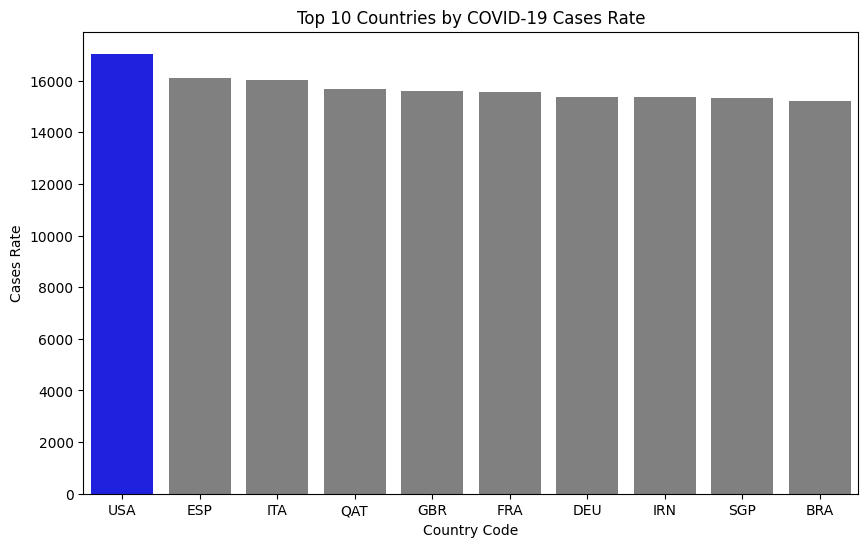

In [37]:
# Top 10 countries by cases rate
cols = ['grey' if (x < max(case_rate_per_country)) else 'blue' for x in case_rate_per_country]    #use orange for bar with max value and grey for all other bars
plt.figure(figsize=(10,6))
sns.barplot(x=case_rate_per_country.head(10).index, y=case_rate_per_country.head(10).values, palette=cols)
plt.title('Top 10 Countries by COVID-19 Cases Rate')
plt.ylabel('Cases Rate')
plt.xlabel('Country Code')
plt.show()

> Negara Amerika Serikat (USA) adalah negara dengan tingkat kasus tertinggi.

Berdasarkan gambar visualisasi tersebut, berikut beberapa insight yang dapat diambil:

- Negara dengan Tingkat Kasus Tertinggi, Negara dengan tingkat kasus COVID-19 tertinggi adalah USA (Amerika Serikat). Hal ini menunjukkan bahwa meskipun memiliki populasi yang besar, kasus COVID-19 per kapita juga sangat tinggi.

- Pola Tingkat Kasus yang Serupa, Negara-negara seperti ESP (Spanyol), ITA (Italia), QAT (Qatar), dan GBR (Inggris) memiliki tingkat kasus yang relatif dekat satu sama lain. Ini menunjukkan bahwa negara-negara ini menghadapi tingkat penyebaran yang hampir setara.

- Distribusi Kasus Global, Negara-negara dalam grafik ini mencakup wilayah dengan sistem kesehatan yang berbeda, dari Amerika Utara (USA), Eropa (ESP, ITA, GBR, FRA, DEU), Timur Tengah (QAT, IRN), hingga Asia Tenggara (SGP). Ini menunjukkan bahwa penyebaran COVID-19 tidak terbatas pada wilayah tertentu tetapi memengaruhi seluruh dunia secara merata.

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\4037146270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=death_rate_per_country.head(10).index, y=death_rate_per_country.head(10).values, palette=cols)
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\4037146270.py:4: UserWarning: The palette list has more values (210) than needed (10), which may not be intended.
  sns.barplot(x=death_rate_per_country.head(10).index, y=death_rate_per_country.head(10).values, palette=cols)


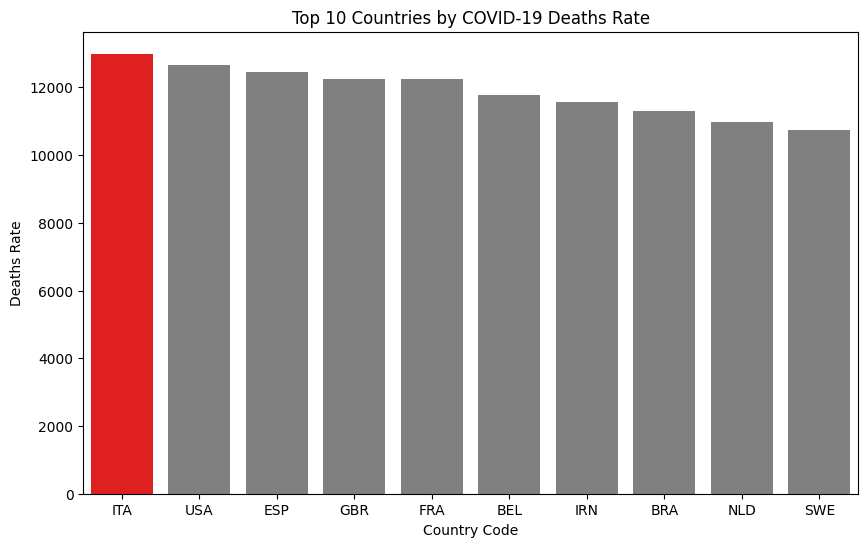

In [38]:
# Top 10 countries by deaths rate
cols = ['grey' if (x < max(case_rate_per_country)) else 'red' for x in case_rate_per_country]    #use orange for bar with max value and grey for all other bars
plt.figure(figsize=(10,6))
sns.barplot(x=death_rate_per_country.head(10).index, y=death_rate_per_country.head(10).values, palette=cols)
plt.title('Top 10 Countries by COVID-19 Deaths Rate')
plt.ylabel('Deaths Rate')
plt.xlabel('Country Code')
plt.show()

> Negara Italia (ITA) adalah negara dengan tingkat kematian COVID-19 tertinggi.

Berdasarkan visualisasi tersebut, berikut adalah beberapa insight yang dapat diambil:
- Negara dengan Tingkat Kematian Tertinggi, Italia (ITA) menempati posisi tertinggi dalam tingkat kematian COVID-19. Ini menunjukkan bahwa Italia menghadapi dampak pandemi yang sangat parah, terutama pada awal penyebaran virus. Faktor-faktor seperti populasi lanjut usia yang besar dan tekanan pada sistem kesehatan dapat menjadi penyebab utamanya.

- Tingkat Kematian Tinggi di Negara Besar, Negara-negara seperti USA (Amerika Serikat), ESP (Spanyol), GBR (Inggris), dan FRA (Prancis) memiliki tingkat kematian yang tinggi, yang mungkin terkait dengan kombinasi populasi besar, lambatnya respons awal terhadap pandemi, dan tingginya tingkat penyebaran di masyarakat.

- Performa Berbeda di Eropa, Eropa mendominasi daftar ini dengan negara-negara seperti Italia (ITA), Spanyol (ESP), Prancis (FRA), Belgia (BEL), dan Belanda (NLD). Ini dapat menunjukkan bahwa meskipun ada langkah-langkah pembatasan yang ketat, beberapa negara mungkin gagal melindungi kelompok rentan seperti lansia.

- Kontras dengan Tingkat Kasus, Beberapa negara yang memiliki tingkat kasus tinggi (seperti Qatar) tidak muncul dalam daftar ini. Sebaliknya, negara dengan tingkat kematian tinggi seperti Italia memiliki tingkat kasus yang lebih rendah, menunjukkan bahwa tingkat kematian dipengaruhi oleh lebih dari sekadar jumlah kasus, seperti kualitas perawatan kesehatan dan demografi populasi.

## Trend Analysis: The Growth of COVID-19 Cases & Deaths Over Time

In [39]:
# Group by date to get global trends
global_cases = df.groupby('DATE')['case rate'].sum().reset_index()
global_deaths = df.groupby('DATE')['death rate'].sum().reset_index()

In [40]:
# # Plot global cases over time
# plt.figure(figsize=(10,6))
# plt.plot(global_cases['DATE'].values, global_cases['case rate'].values, label='Cases Rate', color='blue')
# plt.plot(global_deaths['DATE'].values, global_deaths['death rate'].values, label='Deaths Rate', color='red')
# plt.title('Global COVID-19 Cases and Deaths Over Time')
# plt.ylabel('Count')
# plt.xlabel('Date')
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\42575180.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE'] = pd.to_datetime(df['DATE'])
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\42575180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_28152\42575180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

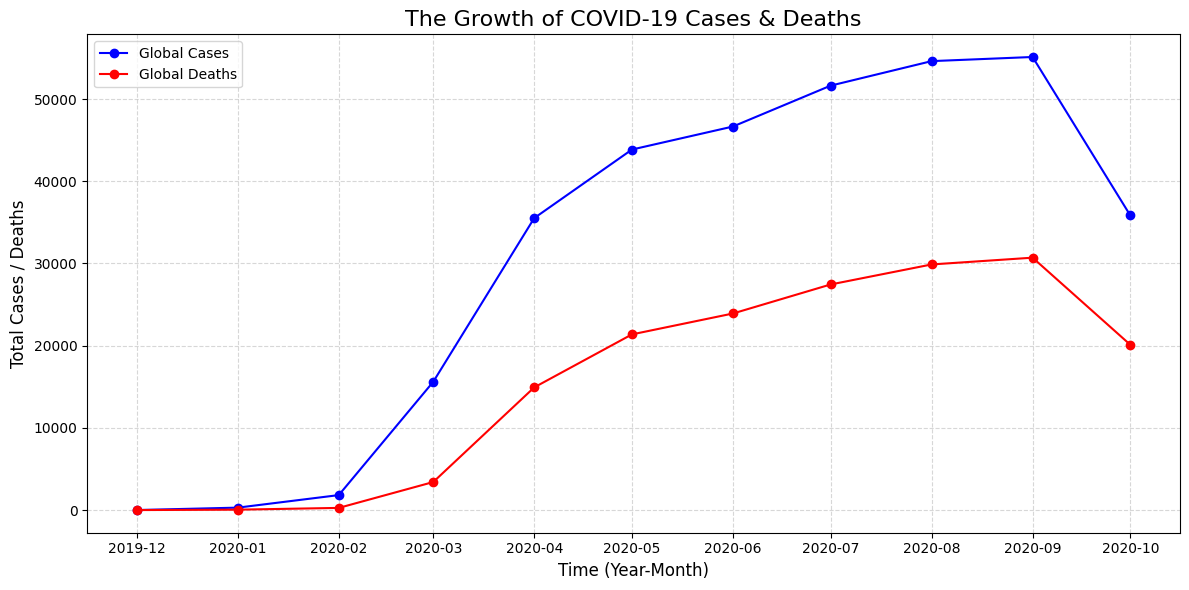

In [41]:
# Mengonversi kolom DATE menjadi tipe datetime jika belum dilakukan
df['DATE'] = pd.to_datetime(df['DATE'])

# Membuat kolom 'Year-Month' untuk pengelompokan per bulan
df['Year-Month'] = df['DATE'].dt.to_period('M')

# Mengelompokkan data per bulan untuk global case dan global deaths
global_monthly_trend = df.groupby('Year-Month')[['total case', 'total death']].sum().reset_index()

# Mengubah kolom 'Year-Month' kembali menjadi datetime untuk plotting
global_monthly_trend['Year-Month'] = global_monthly_trend['Year-Month'].dt.to_timestamp()

# Plotting tren bulanan tingkat kasus dan kematian global
plt.figure(figsize=(12, 6))
plt.plot(global_monthly_trend['Year-Month'], global_monthly_trend['total case'], label='Global Cases', color='blue', marker='o')
plt.plot(global_monthly_trend['Year-Month'], global_monthly_trend['total death'], label='Global Deaths', color='red', marker='o')
plt.title('The Growth of COVID-19 Cases & Deaths', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Total Cases / Deaths', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

> Bulan April hingga Juni 2020 merupakan fase lonjakan tertinggi baik untuk total kasus maupun total kematian. 

Berdasarkan visualisasi tersebut, berikut adalah beberapa insight yang dapat diperoleh:

- Percepatan Awal Penyebaran:
    - Percepatan Awal Penyebaran, Kasus global (Global Cases) mulai meningkat tajam sekitar bulan Maret 2020, menunjukkan titik kritis penyebaran virus secara global.
    - Lonjakan kasus pada fase ini menandakan bahwa virus menyebar cepat di beberapa negara besar, sebelum langkah-langkah mitigasi diterapkan secara luas.

- Peningkatan Konsisten Kematian (Global Deaths)
    - Grafik kematian global (Global Deaths) memperlihatkan pola yang serupa dengan kasus, tetapi dalam jumlah lebih kecil.
    - Kematian terus meningkat secara signifikan hingga sekitar Juni 2020, setelah itu pertumbuhannya melambat. Ini bisa menunjukkan dampak intervensi medis, perbaikan protokol perawatan, atau penerapan kebijakan lockdown.

- Lonjakan Utama Pada Kuartal Kedua 2020
    - Kuartal kedua tahun 2020 (April hingga Juni) merupakan fase lonjakan tertinggi baik untuk kasus maupun kematian. 
    - Fase ini menandai puncak tekanan pada sistem kesehatan global, khususnya di negara-negara dengan kapasitas kesehatan terbatas.

- Kesenjangan antara kasus dan kematian semakin melebar seiring waktu, menunjukkan bahwa tingkat kematian relatif lebih rendah dibandingkan jumlah kasus. Ini bisa disebabkan oleh:
    - Kemajuan dalam perawatan medis dan protokol pengobatan.
    - Upaya untuk melindungi populasi rentan (misalnya lansia dan individu dengan komorbiditas).
    - Variasi tingkat pelaporan kasus di berbagai negara.

- Penurunan di Bulan Oktober 2020, Terdapat penurunan baik pada total kasus maupun kematian di Oktober 2020. Ini bisa diindikasikan oleh:
    - Peningkatan testing dan pelaporan yang lebih akurat sehingga kasus baru terkontrol.
    - Dampak dari strategi pembatasan sosial yang diterapkan sebelumnya.
    - Namun, perlu dicermati apakah ini adalah tren jangka panjang atau hanya variasi musiman.

## Correlation of GDP per Capita & COVID-19 Cases/Deaths

> Adanya hubungan positif antara GDP per Capita dengan tingkat kasus/kematian.

In [42]:
# Rata-rata tingkat kasus dan kematian per negara
df_group_rate = df.groupby('CODE').agg({
    'case rate': 'mean',
    'death rate': 'mean',
    'GDP PER capita': 'mean',
    'stringency index' : 'mean'
}).reset_index()

# Korelasi antara GDP per Capita dengan tingkat kasus dan kematian
correlation_case = df_group_rate['GDP PER capita'].corr(df_group_rate['case rate'])
correlation_death = df_group_rate['GDP PER capita'].corr(df_group_rate['death rate'])

# Print hasil
print("Korelasi antara GDP per Capita dan Tingkat Kasus:", correlation_case)
print("Korelasi antara GDP per Capita dan Tingkat Kematian:", correlation_death)

Korelasi antara GDP per Capita dan Tingkat Kasus: 0.29361255412995774
Korelasi antara GDP per Capita dan Tingkat Kematian: 0.4262639493202744


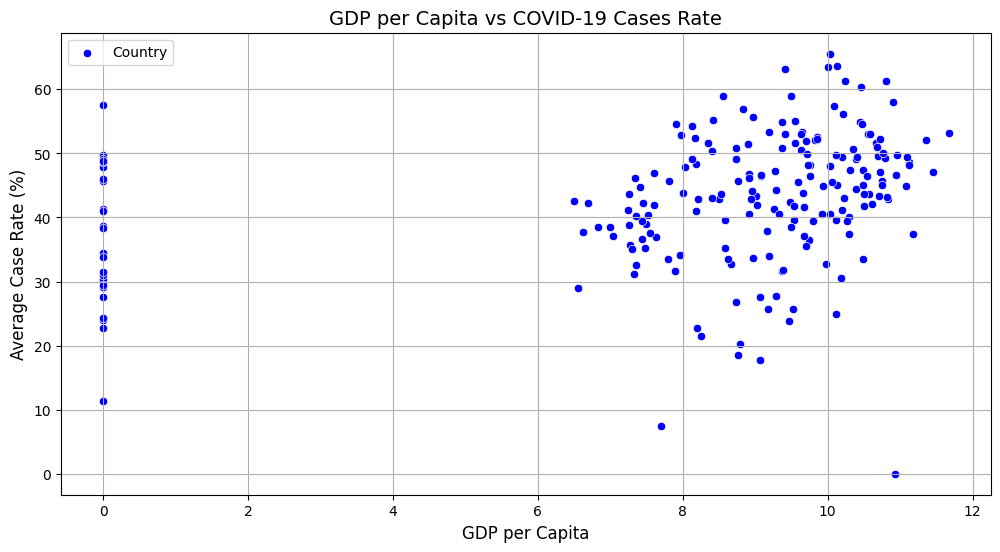

In [43]:
# Scatter plot untuk GDP per Capita vs Rata-rata Tingkat Kasus
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_group_rate['GDP PER capita'], y=df_group_rate['case rate'], color='blue', label='Country')
# sns.regplot(x=df_group_rate['GDP PER capita'], y=df_group_rate['case rate'], scatter=False, color='blue', line_kws={"label":"Regression Line"})
plt.title("GDP per Capita vs COVID-19 Cases Rate", fontsize=14)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Average Case Rate (%)", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

> Negara-negara dengan GDP per Capita lebih tinggi cenderung memiliki rata-rata tingkat kasus COVID-19 yang lebih tinggi dibandingkan negara dengan GDP per Capita rendah.

Berdasarkan visualisasi tersebut, berikut adalah beberapa insight yang dapat diperoleh:

- Pola Hubungan
    - Terdapat kecenderungan bahwa negara-negara dengan GDP per Capita yang lebih tinggi cenderung memiliki tingkat kasus COVID-19 yang lebih tinggi pula.
    - Pola ini menunjukkan kemungkinan korelasi positif antara GDP per Capita dan rata-rata tingkat kasus COVID-19.

- Distribusi Data
    - Sebagian besar negara dengan GDP per Capita yang rendah (sekitar 0-3) memiliki tingkat kasus yang beragam, tetapi terlihat konsentrasi di tingkat kasus rendah hingga sedang.
    - Negara-negara dengan GDP per Capita tinggi (di atas 8) cenderung memiliki rata-rata tingkat kasus yang cukup tinggi (>20%).

- Outliers
    - Ada beberapa negara dengan GDP per Capita sangat rendah tetapi memiliki tingkat kasus yang cukup tinggi. Hal ini dapat menunjukkan pengaruh faktor lain seperti kebijakan kesehatan masyarakat, sistem pelaporan, atau populasi.
    - Terdapat negara dengan GDP per Capita tinggi tetapi memiliki tingkat kasus yang relatif rendah. Ini mungkin disebabkan oleh tindakan mitigasi yang lebih efektif.

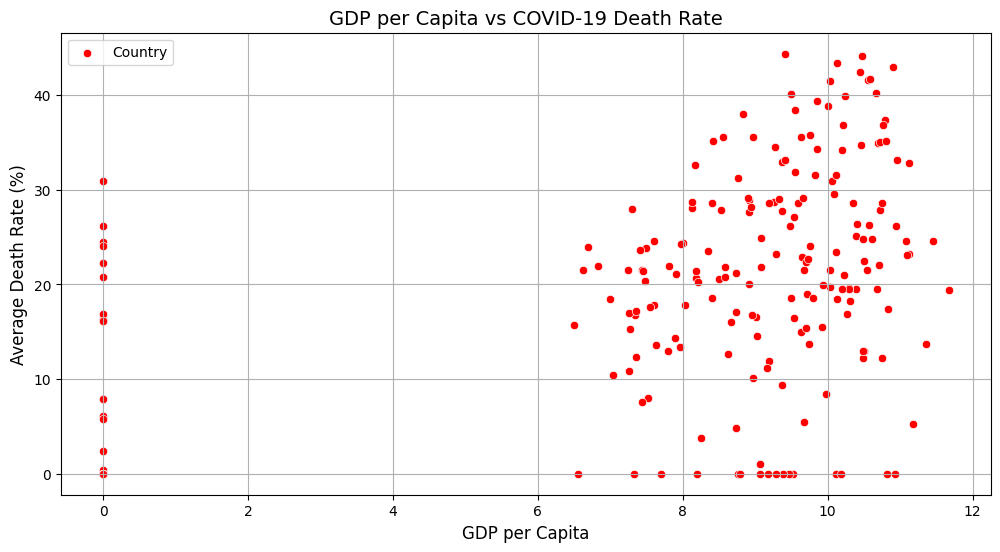

In [44]:
# Scatter plot untuk GDP per Capita vs Rata-rata Tingkat Kematian
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_group_rate['GDP PER capita'], y=df_group_rate['death rate'], color='red', label='Country')
# sns.regplot(x=df_group_rate['GDP PER capita'], y=df_group_rate['death rate'], scatter=False, color='red', line_kws={"label":"Regression Line"})
plt.title("GDP per Capita vs COVID-19 Death Rate", fontsize=14)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Average Death Rate (%)", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

> Negara-negara dengan GDP per Capita lebih tinggi juga cenderung memiliki rata-rata tingkat kematian COVID-19 yang lebih tinggi.

Berdasarkan visualisasi tersebut, berikut adalah beberapa insight yang dapat diperoleh:

- Pola Hubungan
    - Tampak adanya kecenderungan bahwa negara-negara dengan GDP per Capita yang lebih tinggi memiliki rata-rata tingkat kematian COVID-19 yang lebih tinggi.
    - Hal ini mengindikasikan adanya kemungkinan korelasi positif antara GDP per Capita dan tingkat kematian COVID-19.

- Distribusi Data
    - Pada GDP per Capita rendah (0-3), rata-rata tingkat kematian bervariasi, tetapi banyak negara memiliki tingkat kematian yang sangat rendah (mendekati 0%).
    - Negara dengan GDP per Capita tinggi (8-12) cenderung memiliki rata-rata tingkat kematian yang lebih tinggi, berkisar antara 10% hingga lebih dari 30%.

- Outliers
    - Beberapa negara dengan GDP per Capita rendah memiliki tingkat kematian yang tinggi. 
    - Hal ini mungkin disebabkan oleh sistem kesehatan yang tidak memadai, keterbatasan akses ke perawatan intensif, dan pelaporan yang kurang akurat.
    - Ada juga negara dengan GDP per Capita tinggi namun tingkat kematiannya rendah, yang mungkin mencerminkan langkah mitigasi yang efektif.

## Analysis of Stringency Index & COVID-19 Cases

In [45]:
# Calculate correlation between Stringency Index and total cases
# stringency_cases_corr = df[['stringency index', 'total case']].corr().iloc[0, 1]
stringency_cases_corr = df_group_rate[['stringency index', 'case rate']].corr().iloc[0, 1]
print(f"Correlation between Stringency Index and Total Cases: {stringency_cases_corr}")

Correlation between Stringency Index and Total Cases: 0.22628705990886602


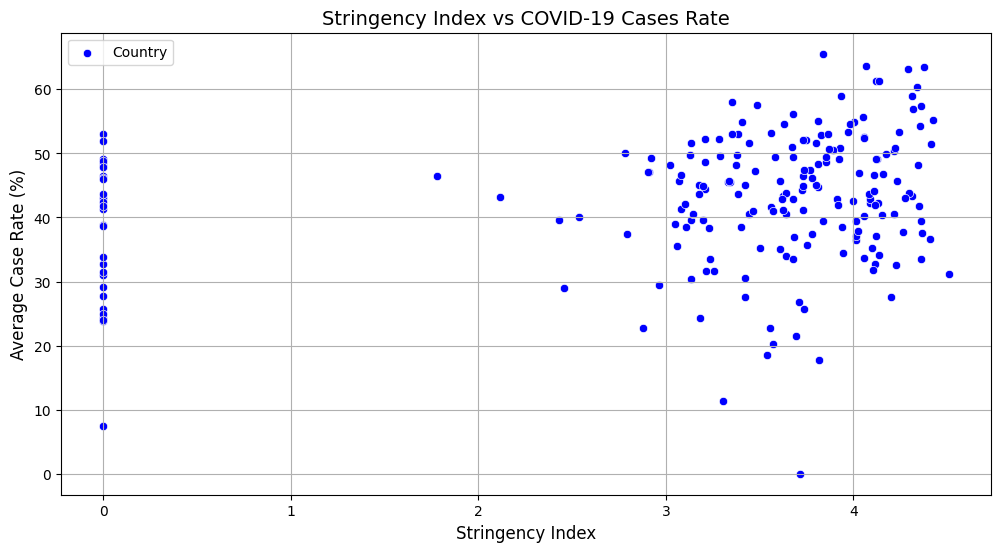

In [46]:
# Scatter plot untuk Stringency Index vs Rata-rata Tingkat Kasus
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_group_rate['stringency index'], y=df_group_rate['case rate'], color='blue', label='Country')
# sns.regplot(x=df_group_rate['Stringency Index'], y=df_group_rate['case rate'], scatter=False, color='blue', line_kws={"label":"Regression Line"})
plt.title("Stringency Index vs COVID-19 Cases Rate", fontsize=14)
plt.xlabel("Stringency Index", fontsize=12)
plt.ylabel("Average Case Rate (%)", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

> Stringency Index tidak memiliki korelasi yang jelas dengan Tingkat Kasus COVID-19.

Berdasarkan visualisasi tersebut, berikut adalah beberapa insight yang dapat diperoleh:

- Tidak ada korelasi jelas, hal ini menunjukkan bahwa:
    - Faktor-faktor lain seperti kapasitas pengujian, perilaku masyarakat, dan kepadatan penduduk mungkin lebih berpengaruh terhadap tingkat kasus.
    - Waktu penerapan kebijakan (terlambat atau tidaknya) bisa menjadi faktor signifikan dalam menentukan efektivitas.

- Distribusi yang Tidak Merata
    - Banyak negara dengan Stringency Index rendah memiliki tingkat kasus yang sangat tinggi, mungkin karena kebijakan diterapkan terlambat atau masyarakat tidak mematuhi aturan.
    - Sebaliknya, terdapat negara dengan Stringency Index tinggi namun tingkat kasus relatif rendah, yang mungkin mencerminkan efektivitas kebijakan dan kepatuhan masyarakat.

- Outliers
    - Terdapat beberapa outliers (negara dengan tingkat kasus sangat tinggi meskipun Stringency Index cukup tinggi). 
    - Hal ini bisa menjadi indikasi kebijakan yang terlambat diimplementasikan atau tantangan dalam penerapan kebijakan di lapangan.

## Correlation between Population & COVID-19 Cases

In [47]:
# Rata-rata tingkat kasus dan kematian per negara
df_group = df.groupby('CODE').agg({
    'population': 'max',
    'total death': 'max',
    'total case': 'max',
}).reset_index()
df_group

,CODE,population,total death,total case
0,ABW,11.578395,3.526361,8.371474
1,AFG,17.477233,7.307873,10.601622
2,AGO,17.307957,5.484797,8.917579
3,AIA,9.615939,0.000000,1.098612
4,ALB,14.872537,6.111467,9.744199
...,...,...,...,...
205,VNM,18.393706,3.555348,7.033506
206,YEM,17.210890,6.391917,7.629976
207,ZAF,17.898266,9.823957,13.464240
208,ZMB,16.726989,5.846439,9.671114


In [48]:
# Calculate correlation between Population and total cases
# population_cases_corr = df[['population', 'total case']].corr().iloc[0, 1]
population_cases_corr = df_group[['population', 'total case']].corr().iloc[0, 1]
print(f"Correlation between Population and Total Cases: {population_cases_corr}")

Correlation between Population and Total Cases: 0.7325802609065964


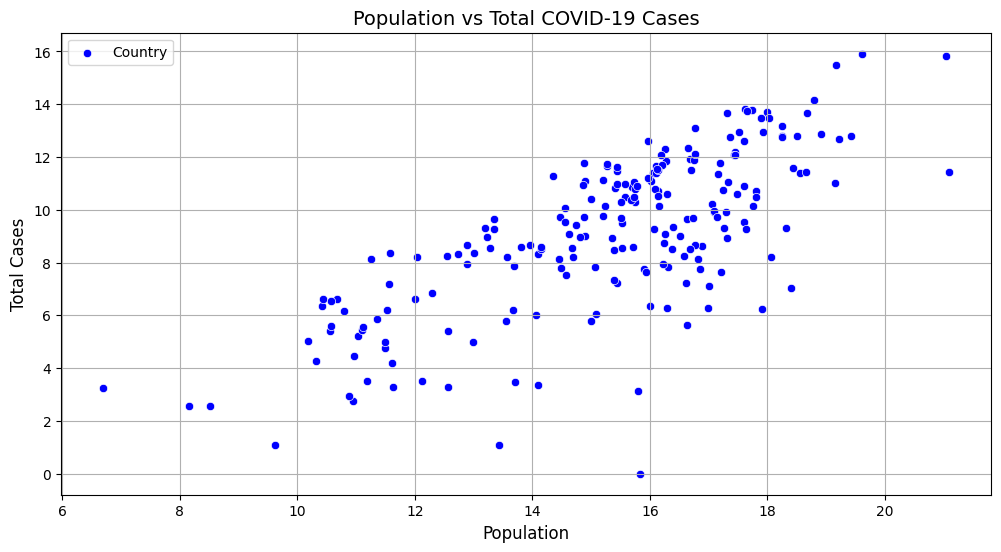

In [49]:
# Scatter plot untuk population vs total kasus
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_group['population'], y=df_group['total case'], color='blue', label='Country')
# sns.regplot(x=df_group['population'], y=df_group['total case'], scatter=False, color='blue', line_kws={"label":"Regression Line"})
plt.title("Population vs Total COVID-19 Cases", fontsize=14)
plt.xlabel("Population", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

> Populasi memiliki pengaruh besar terhadap jumlah total kasus COVID-19.

Berdasarkan visualisasi tersebut, berikut adalah beberapa insight yang dapat diperoleh:

- Hubungan Positif antara Populasi dan Total Kasus
    - Scatter plot menunjukkan tren positif antara populasi dan total kasus COVID-19. Artinya, semakin besar populasi suatu negara, semakin tinggi pula jumlah total kasus COVID-19 yang dilaporkan.
    - Negara dengan populasi besar memiliki jumlah kasus yang cenderung tinggi karena potensi penyebaran virus yang lebih luas.

- Penyebaran Data
    - Terdapat variasi besar dalam jumlah kasus untuk negara dengan populasi sedang hingga tinggi. 
    - Beberapa negara dengan populasi serupa memiliki total kasus yang berbeda jauh, mengindikasikan adanya perbedaan dalam respons terhadap pandemi, seperti pengujian, pelaporan kasus, atau kebijakan mitigasi.

- Outliers
    - Beberapa negara dengan populasi besar memiliki jumlah kasus relatif lebih rendah dari tren umum. Hal ini bisa jadi karena kebijakan pengendalian pandemi yang sangat efektif dan kurangnya pelaporan atau pengujian yang tidak memadai.
    - Sebaliknya, ada negara dengan populasi sedang yang memiliki jumlah kasus sangat tinggi, mengindikasikan tingkat penyebaran virus yang lebih parah atau kemungkinan pelaporan yang lebih baik.

# Advanced Data Analysis

## Analysis of Economic Impact

### Correlation between GDP per Capita & Pandemic Response Rate (Stringency Index)

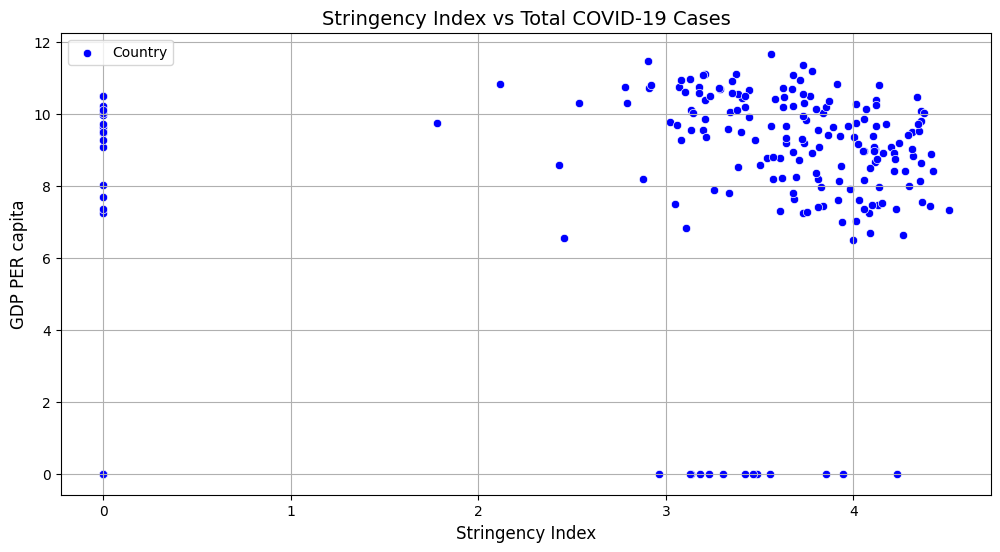

In [50]:
# Scatter plot hubungan GDP per Capita dan Stringency Index
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_group_rate['stringency index'], y=df_group_rate['GDP PER capita'], color='blue', label='Country')
# sns.regplot(x=df_group['stringency index'], y=df_group['GDP PER capita'], scatter=False, color='blue', line_kws={"label":"Regression Line"})
plt.title("Stringency Index vs Total COVID-19 Cases", fontsize=14)
plt.xlabel("Stringency Index", fontsize=12)
plt.ylabel("GDP PER capita", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

> Setiap negara dalam menangani pandemi tidak sepenuhnya bergantung pada tingkat GDP.

Berdasarkan visualisasi tersebut, berikut adalah beberapa insight yang dapat diperoleh:

- Konsentrasi di Indeks Stringency Tinggi (3-4):
    - Sebagian besar negara dengan GDP per capita yang tinggi memiliki indeks penanganan pandemi (stringency index) dalam kisaran 3 hingga 4. 
    - Hal ini menunjukkan bahwa negara-negara tersebut cenderung menerapkan kebijakan yang ketat dalam menangani pandemi.

- Keterbatasan Korelasi Langsung:
    - Tidak terlihat hubungan yang jelas antara GDP per capita dan tingkat kebijakan penanganan pandemi. 
    - Hal ini mengindikasikan bahwa faktor lain, seperti kesiapan sistem kesehatan, persepsi risiko, dan budaya nasional, mungkin memiliki pengaruh lebih besar terhadap tingkat kebijakan.

## Analysis of Environmental Impact

Pandemi COVID-19 secara tidak langsung berdampak pada lingkungan global. Dengan adanya penutupan pabrik, pengurangan perjalanan udara, dan lockdown, emisi karbon global menurun drastis selama 2020. Data dari International Energy Agency (IEA) menunjukkan bahwa emisi karbon global turun lebih dari 5% pada tahun 2020 karena berkurangnya aktivitas ekonomi dan transportasi. Berikut merupakan visualisasi dari grafiknya.

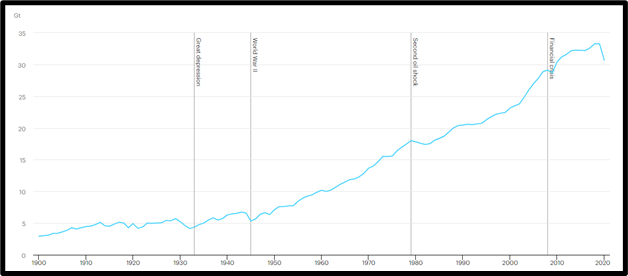

Source: https://www.iea.org/reports/global-energy-review-2020/global-energy-and-co2-emissions-in-2020